# Programming for Data Analytics - Project - Gerard Ball

> For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose.
Specifically, in this project you should:
• Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
• Investigate the types of variables involved, their likely distributions, and their relationships with each other.
• Synthesise/simulate a data set as closely matching their properties as possible.
• Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.
Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set. 




## Road Map
1. Introduction 
2. Aim
3. Images of subjects
4. Data Collection
5. Data Synthesis
6. Exploratory Data Analysis
7. Data Visualisation
8. Statistical Analysis
9. Interpretations of results and Discussions
10. Conclusion


## Introduction

Roller coasters offer a budding adrenaline junkie a release from the trials and tribulations of everyday life. Like many things in life, coasters come in all manner of sizes and types and understanding and discerning the relatsionsip between much of them, can offer up some valuable data analysis. The mission of this project is to simulate and synthesize a diverse these roller coasters, capturing variables like speed, height, type and thrill rating. By carrying out this synthesis, the prtoject aims to create a comprehensive and varied representation of roller coasters worldwide and their many types. The dataset will serve as a valuable resource for analysis, providing insights into the relationships between different coaster characteristics. By leveraging this simulated data, I strive to enhance understanding and appreciation of the factors contributing to the thrill and excitement offered by these wonderful marvels of modern engineering whilst facilitating potential insights for enthusiasts, theme park planners and the amusement industry itself. 

## Data Collection reference aka the real data phenomenon

## Data Synthesis


In [11]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Num of data points
num_pints = 100
mycoasterdata = pd.DataFrame({
    'Roller Coaster': [f'Coaster_{i+1}' for i in range(num_pints)],
    'Type': np.random.choice(['Steel', 'Wooden', 'Hybrid'], size=num_pints),
    'Speed (km/h)': np.random.normal(loc=100, scale=15, size=num_pints),
    'Height (m)': np.random.normal(loc=50, scale=15, size=num_pints),
})

# steel faster, taller more thrillin on average
steel_mask = mycoasterdata['Type'] == 'Steel'
mycoasterdata.loc[steel_mask, 'Speed (km/h)'] += 20
mycoasterdata.loc[steel_mask, 'Height (m)'] += 10

mycoasterdata['Thrill Rating'] = (
    0.3 * mycoasterdata['Speed (km/h)'] +
    0.4 * mycoasterdata['Height (m)'] +
    np.random.normal(loc=8, scale=1, size=num_pints)
)

mycoasterdata.to_csv('coasterss.csv', index=False)

In [12]:
import pandas as pd
synthesised_data = pd.read_csv('coasterss.csv')

# mean and median
mean = synthesised_data.mean()
median = synthesised_data.median()

print("Mean:")
print(mean)

print("\nMedian:")
print(median)

Mean:
Speed (km/h)     107.954113
Height (m)        55.959383
Thrill Rating     62.919193
dtype: float64

Median:
Speed (km/h)     106.980178
Height (m)        55.295932
Thrill Rating     62.981672
dtype: float64


/var/folders/dg/9958h0ld4fsbyrqhh8fl7t3r0000gn/T/ipykernel_2456/2618024873.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = synthesised_data.mean()
/var/folders/dg/9958h0ld4fsbyrqhh8fl7t3r0000gn/T/ipykernel_2456/2618024873.py:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = synthesised_data.median()


In [13]:
import pandas as pd
roller_coaster_data = pd.read_csv('Coasterss.csv')
grouped_data = roller_coaster_data.groupby('Type')
mean_values = grouped_data.mean()
median_values = grouped_data.median()

print("Mean values for each type:")
print(mean_values)

print("\nMedian values for each type:")
print(median_values)

Mean values for each type:
        Speed (km/h)  Height (m)  Thrill Rating
Type                                           
Hybrid    100.588160   52.768262      59.414376
Steel     123.042441   60.323624      69.158773
Wooden    100.466050   54.706740      60.217614

Median values for each type:
        Speed (km/h)  Height (m)  Thrill Rating
Type                                           
Hybrid    102.633299   52.622495      58.483179
Steel     119.889298   60.227149      69.147440
Wooden     99.573049   54.025590      60.448528


/var/folders/dg/9958h0ld4fsbyrqhh8fl7t3r0000gn/T/ipykernel_2456/3336080302.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_values = grouped_data.mean()
/var/folders/dg/9958h0ld4fsbyrqhh8fl7t3r0000gn/T/ipykernel_2456/3336080302.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_values = grouped_data.median()


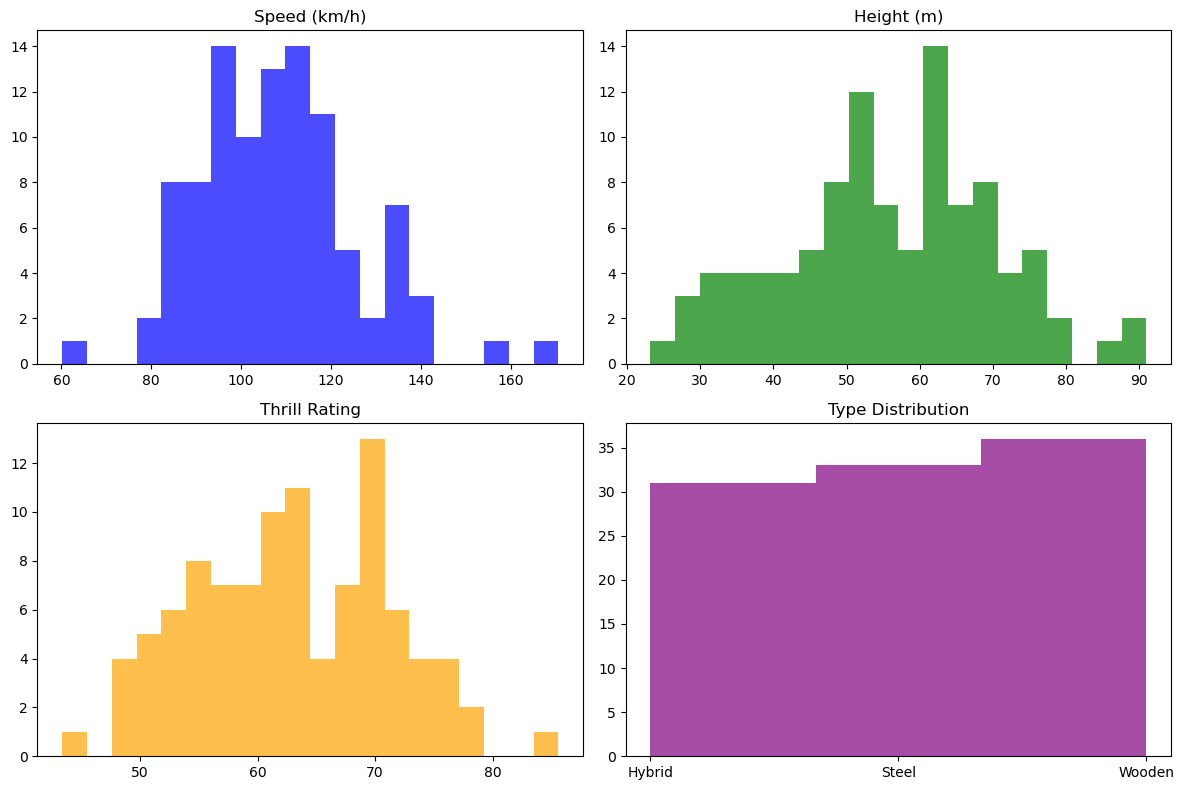

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
mycoasterdata = pd.read_csv('Coasterss.csv')

# Plot histograms for each variable
plt.figure(figsize=(12, 8))

# Speed
plt.subplot(2, 2, 1)
plt.hist(mycoasterdata['Speed (km/h)'], bins=20, color='blue', alpha=0.7)
plt.title('Speed (km/h)')

# Height
plt.subplot(2, 2, 2)
plt.hist(mycoasterdata['Height (m)'], bins=20, color='green', alpha=0.7)
plt.title('Height (m)')

# Thrill Rating
plt.subplot(2, 2, 3)
plt.hist(mycoasterdata['Thrill Rating'], bins=20, color='orange', alpha=0.7)
plt.title('Thrill Rating')

# Type"
plt.subplot(2, 2, 4)
plt.hist(mycoasterdata['Type'], bins=3, color='purple', alpha=0.7)
plt.title('Type Distribution')

plt.tight_layout()
plt.show()

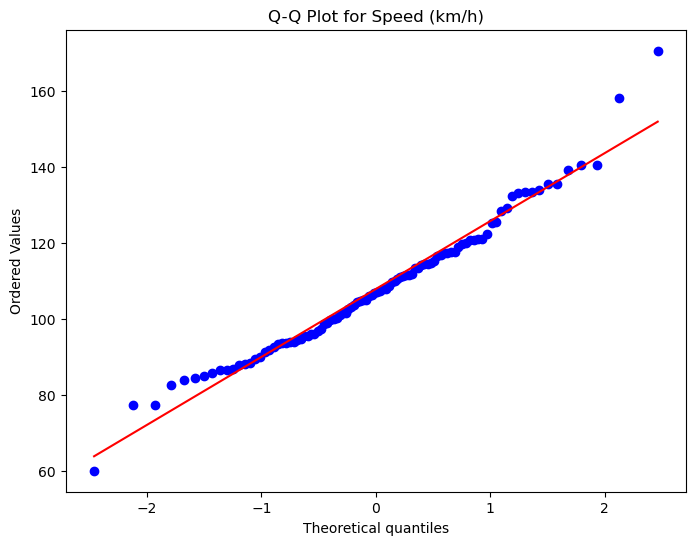

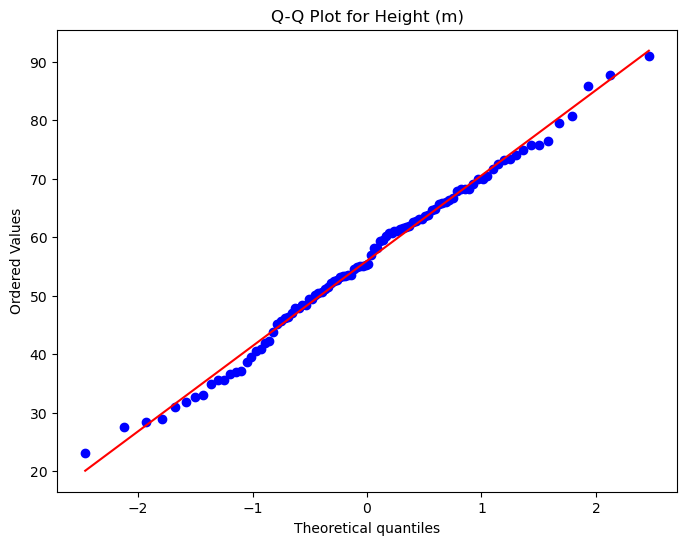

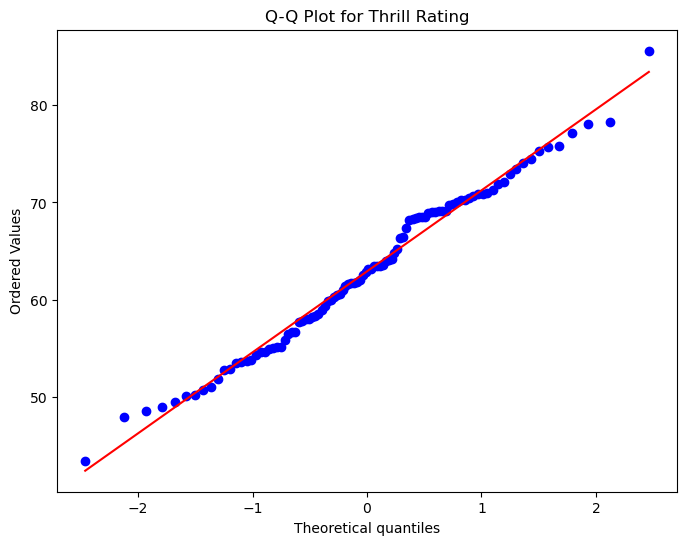

In [15]:
import matplotlib.pyplot as plt
from scipy.stats import probplot
import pandas as pd
mycoasterdata = pd.read_csv('coasterss.csv')

#numerical vars for Q-Q plots
numerical_vars = ['Speed (km/h)', 'Height (m)', 'Thrill Rating']
for variable in numerical_vars:
    # Create Q-Q plot
    plt.figure(figsize=(8, 6))
    probplot(mycoasterdata[variable], dist='norm', plot=plt)
    plt.title(f'Q-Q Plot for {variable}')
    plt.show()

From using histograms of all variables within my synthersised dataset as well as qq plots of the 3 numerical variables - Speed, Height and Thrill follow a mostly Normal Distribution. This was determined was viewing a bell curve and somewhat symmetrical outline. Calculating and observing means and medians (for which are either idential or very close) was also used for a clue as normal distributions should have the same median and mean values or as close to the same as possible. The type variable is a categorical variable. It is such because it reprrsents the following: 
"The categories are discrete.
There are two or more potential categories.
The probability that the random variable takes on a value in each category must be between 0 and 1.
The sum of the probabilities for all categories must sum to 1" - [Statology, Statistics Simplifid](https://www.statology.org/categorical-distribution/)

In [16]:
import pandas as pd


mycoasterdata = pd.read_csv('Coasterss.csv')

# var ypes determie my var types. oroller coaster and types vars are object strings so should be categorical whereas speed, height and thrill rating are showing floats which is numerical.
print(roller_coaster_data.dtypes)

Roller Coaster     object
Type               object
Speed (km/h)      float64
Height (m)        float64
Thrill Rating     float64
dtype: object


In [17]:
import pandas as pd
mycoasterdata = pd.read_csv('coasterss.csv')
numerical_vars = mydata[['Speed (km/h)', 'Height (m)', 'Thrill Rating']]
correlation_matrix = numerical_vars.corr()

#correlation matrix
print(correlation_matrix)

NameError: name 'mydata' is not defined

. The above correlation coefficient was done for the 3 numerical vars. The results show that speed and height have a coefficient of 0.074 which indicates a positive relationship, albeit only just. The 'real' data would likely have a higher relationship between height and speed than this - so I must not have coded the parameters as accurately as needed. Still, this indicates that there is a slight relationship that the taller the roller coaster, the faster it is. 

Speed and thrill rating maintain a very strong positive correlation of 0.713 which indicates that the faster the roller coaster is, the higher its thrill rating generally is.

Height and thrill rating share the strongest positive coefficient at 0.742 which indicates that the taller the coaster, the higher its thrill rating generally is. All very logical besides a lower than expected coefficient for the variables speed and height with only a positive correlation coefficient of 0.07. Would expect it to be given I know the nature of the 'rea;' data. Will analyse 'real' data thoroughly later to determine how close the synthesided dataset aligns with it. 

In [10]:
import pandas as pd
mycoasterdata = pd.read_csv('coasterss.csv')

stats = mycoasterdata.groupby('Type').describe()

# Display the descriptive statistics
print(stats)

       Speed (km/h)                                                            \
              count        mean        std        min         25%         50%   
Type                                                                            
Hybrid         31.0  100.588160  12.150215  77.377701   92.291133  102.633299   
Steel          33.0  123.042441  17.185306  89.665276  114.176034  119.889298   
Wooden         36.0  100.466050  13.588797  60.172359   93.042567   99.573049   

                               Height (m)             ...             \
               75%         max      count       mean  ...        75%   
Type                                                  ...              
Hybrid  109.916592  121.059381       31.0  52.768262  ...  63.143925   
Steel   133.552987  170.584444       33.0  60.323624  ...  68.243645   
Wooden  108.933059  125.599074       36.0  54.706740  ...  65.082618   

                  Thrill Rating                                             \
  